In [24]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Velocidad_sin_Rangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [26]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [30]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [31]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              18884 non-null  object 
 1   Trimestre        18884 non-null  int64  
 2   Provincia        18884 non-null  object 
 3   Velocidad        18874 non-null  float64
 4   Accesos          18884 non-null  int64  
 5   Trimestre_Label  18884 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 885.3+ KB
None


In [32]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [33]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
               Año     Trimestre     Provincia     Velocidad       Accesos  \
count        18884  18884.000000         18884  18874.000000  1.888400e+04   
unique           8           NaN            23           NaN           NaN   
top     2023-01-01           NaN  BUENOS AIRES           NaN           NaN   
freq          3457           NaN          3046           NaN           NaN   
mean           NaN      2.477653           NaN     96.171156  1.412328e+04   
std            NaN      1.126947           NaN    379.722905  6.856387e+04   
min            NaN      1.000000           NaN      0.000000  0.000000e+00   
25%            NaN      1.000000           NaN      4.000000  2.600000e+01   
50%            NaN      2.000000           NaN     12.300000  6.725000e+02   
75%            NaN      4.000000           NaN     50.100000  6.114000e+03   
max            NaN      4.000000           NaN  10000.000000  1.3463

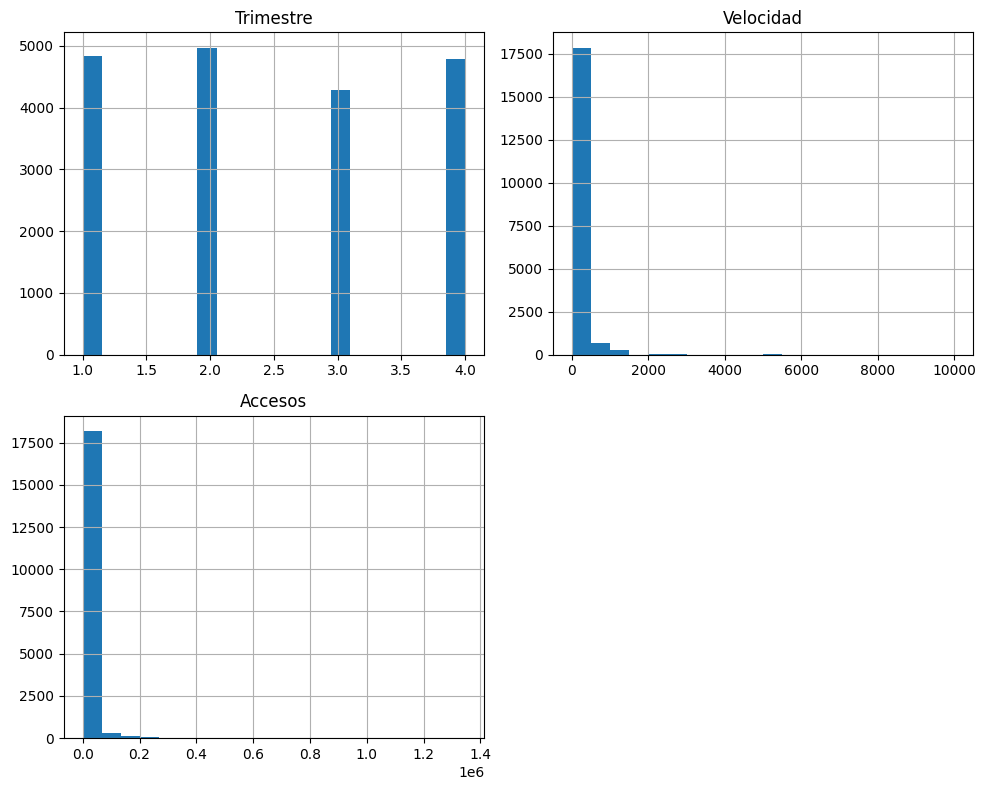

In [34]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
           Trimestre  Velocidad   Accesos
Trimestre   1.000000   0.000839 -0.000093
Velocidad   0.000839   1.000000 -0.015584
Accesos    -0.000093  -0.015584  1.000000


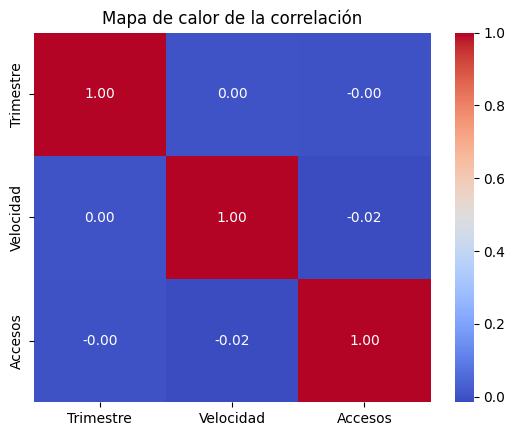

In [35]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [36]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Año y Provincia:
Provincia   BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Año                                                                       
2017-01-01            70         12     23      16          21       25   
2018-01-01           281         53     87      71          82      110   
2019-01-01           352         62     96      82          82      158   
2020-01-01           473         78    110      90          83      190   
2021-01-01           527         89    111     100          98      212   
2022-01-01           525         86    116     120         106      225   
2023-01-01           553         90    120     131         114      246   
2024-01-01           265         47     58      75          58      126   

Provincia   ENTRE RÍOS  FORMOSA  JUJUY  LA PAMPA  ...  NEUQUÉN  RÍO NEGRO  \
Año                                               ...                       
2017-01-01          24       19     12        20  

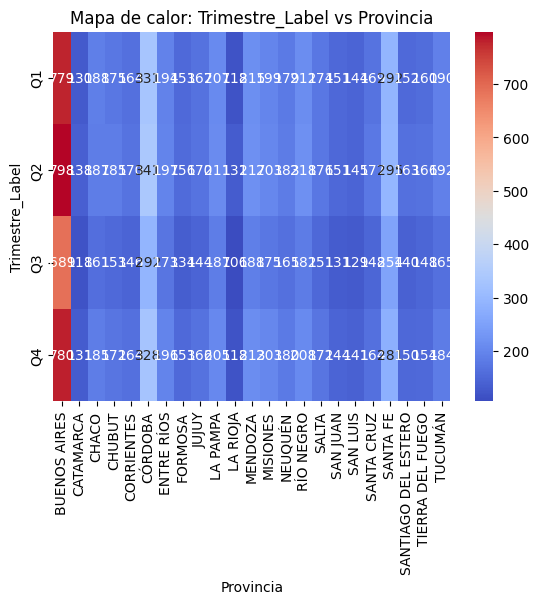

In [37]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [38]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
       Trimestre  Velocidad   Accesos
0      -0.423858        NaN -0.190503
1      -0.423858        NaN -0.205132
2      -0.423858        NaN -0.205920
3      -0.423858        NaN  0.402726
4      -0.423858        NaN -0.190795
...          ...        ...       ...
18879   1.350896        NaN  0.453862
18880   1.350896        NaN -0.204884
18881   1.350896        NaN  0.147585
18882   1.350896        NaN -0.186988
18883   1.350896        NaN -0.142299

[18884 rows x 3 columns]


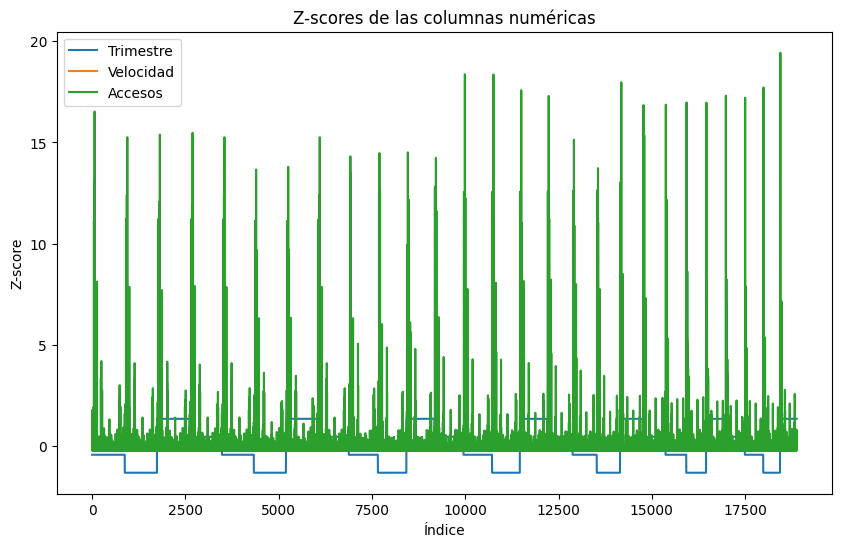

In [39]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [40]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Año':
Año
2023-01-01    3457
2022-01-01    3227
2021-01-01    3041
2020-01-01    2686
2019-01-01    2306
2018-01-01    1982
2024-01-01    1738
2017-01-01     447
Name: count, dtype: int64

Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           3046
CÓRDOBA                1292
SANTA FE               1122
MENDOZA                 833
RÍO NEGRO               820
LA PAMPA                810
MISIONES                780
ENTRE RÍOS              760
TUCUMÁN                 731
CHACO                   721
NEUQUÉN                 707
CHUBUT                  685
SALTA                   673
SANTA CRUZ              658
JUJUY                   647
CORRIENTES              644
TIERRA DEL FUEGO        628
SANTIAGO DEL ESTERO     605
FORMOSA                 596
SAN JUAN                577
SAN LUIS                559
CATAMARCA               517
LA RIOJA                473
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre

In [41]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


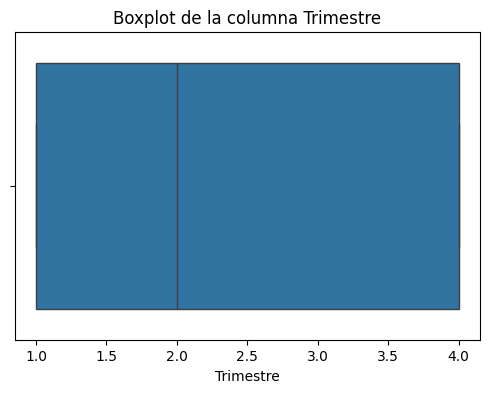

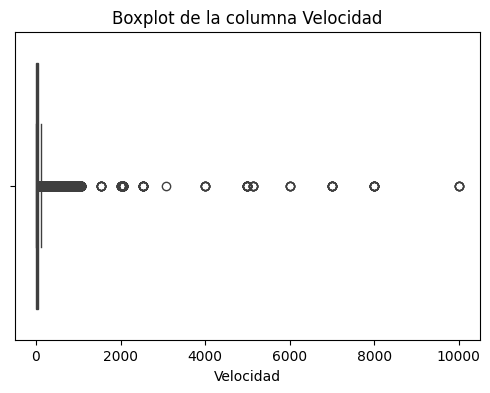

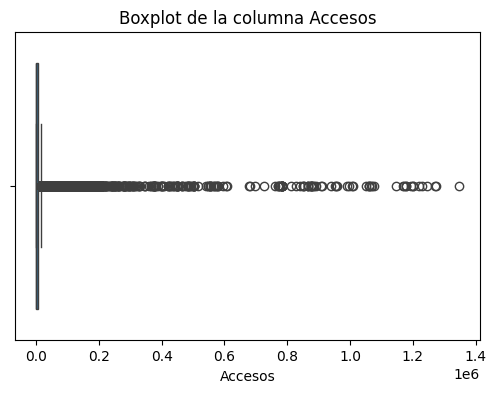

In [42]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [43]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                 0
Trimestre           0
Provincia           0
Velocidad          10
Accesos             0
Trimestre_Label     0
dtype: int64


In [44]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [45]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [46]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [47]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Año                 0
Trimestre           0
Provincia           0
Velocidad          10
Accesos             0
Trimestre_Label     0
dtype: int64


In [48]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Velocidad_sin_Rangos.csv


In [51]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Trimestre     0.049937
Velocidad    14.304939
Accesos      11.228155
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Trimestre     -1.377860
Velocidad    273.817899
Accesos      152.041174
dtype: float64


In [53]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
    Variable       VIF
0      const  5.941306
1  Trimestre  1.000001
2  Velocidad  1.000244
3    Accesos  1.000243


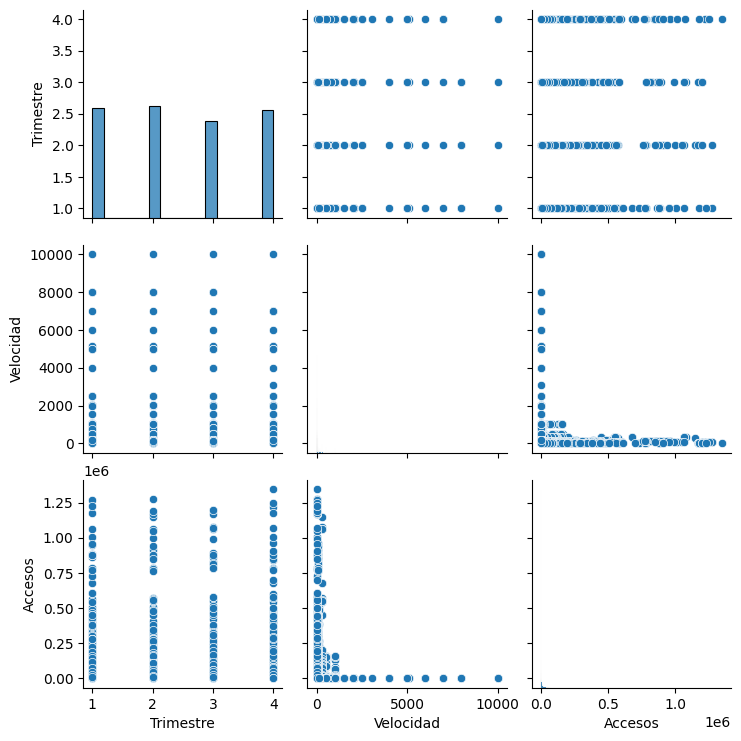

In [54]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [55]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Año':
           Trimestre                                              Velocidad  \
               count      mean       std  min  25%  50%  75%  max     count   
Año                                                                           
2017-01-01     447.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0     447.0   
2018-01-01    1982.0  2.559031  1.108135  1.0  2.0  3.0  4.0  4.0    1982.0   
2019-01-01    2306.0  2.565048  1.114827  1.0  2.0  3.0  4.0  4.0    2306.0   
2020-01-01    2686.0  2.568503  1.122795  1.0  2.0  3.0  4.0  4.0    2685.0   
2021-01-01    3041.0  2.505426  1.111270  1.0  2.0  3.0  3.0  4.0    3038.0   
2022-01-01    3227.0  2.545088  1.114381  1.0  2.0  3.0  4.0  4.0    3225.0   
2023-01-01    3457.0  2.507955  1.121139  1.0  2.0  3.0  4.0  4.0    3455.0   
2024-01-01    1738.0  1.502877  0.500136  1.0  1.0  2.0  2.0  2.0    1736.0   

                        ...                 Accesos                \
                  mean  ...

In [56]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
13
